In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("train (1).csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_num = df.select_dtypes(include=['int64', 'float64']).copy()

In [6]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
print(df_num.shape)

(1460, 38)


In [8]:
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
df_num = df_num.fillna(df_num.median())

In [10]:
df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [11]:
X = df_num.drop(columns=['SalePrice'])
y = df_num['SalePrice']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print("Baseline R2 :", r2_score(y_test,y_pred))

Baseline R2 : 0.8226775450640375


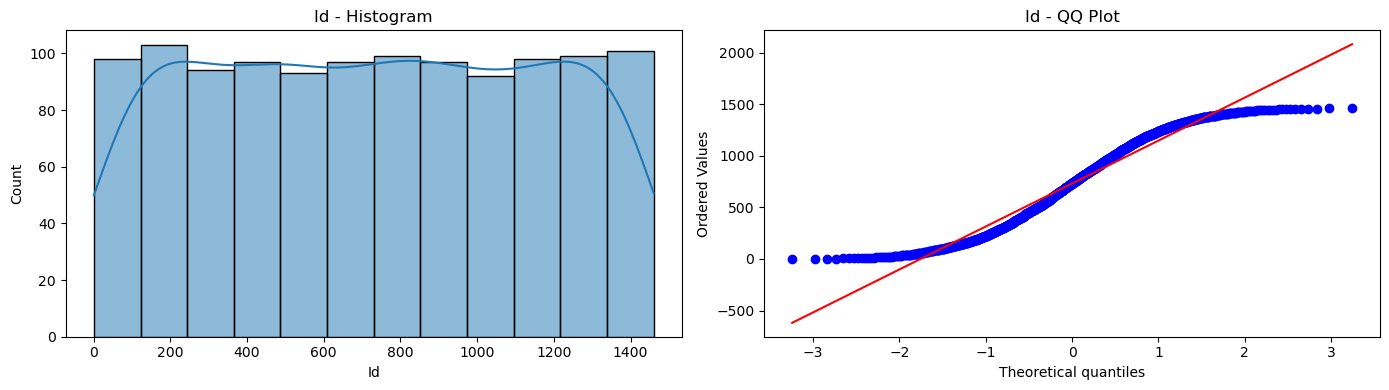

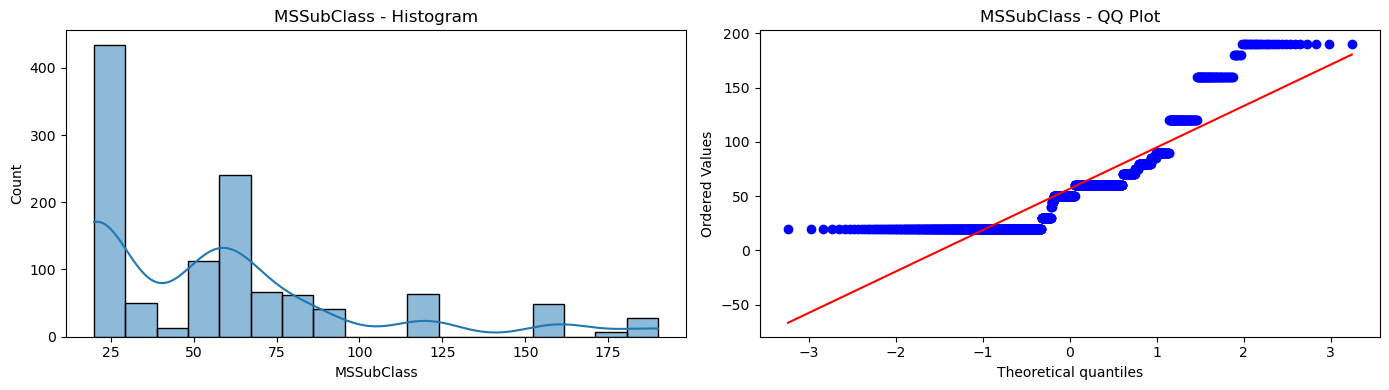

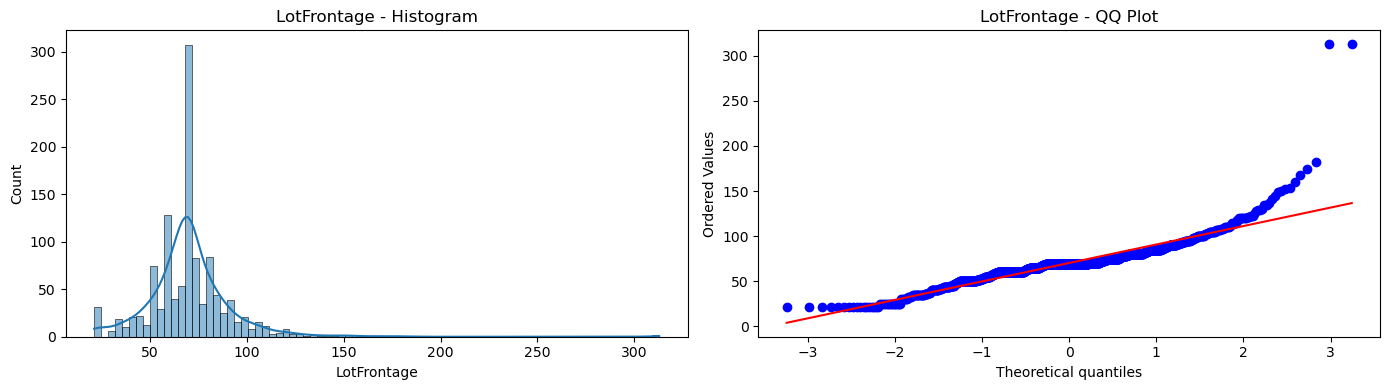

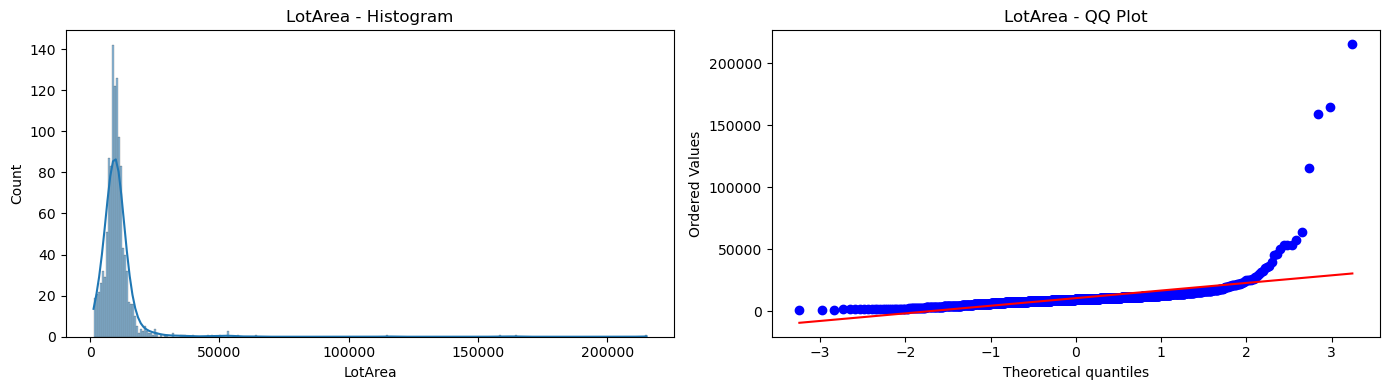

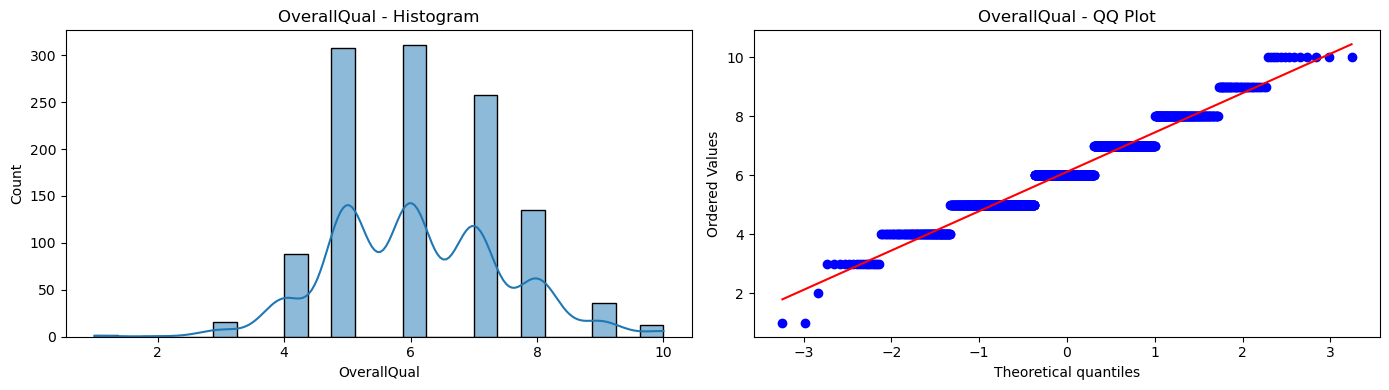

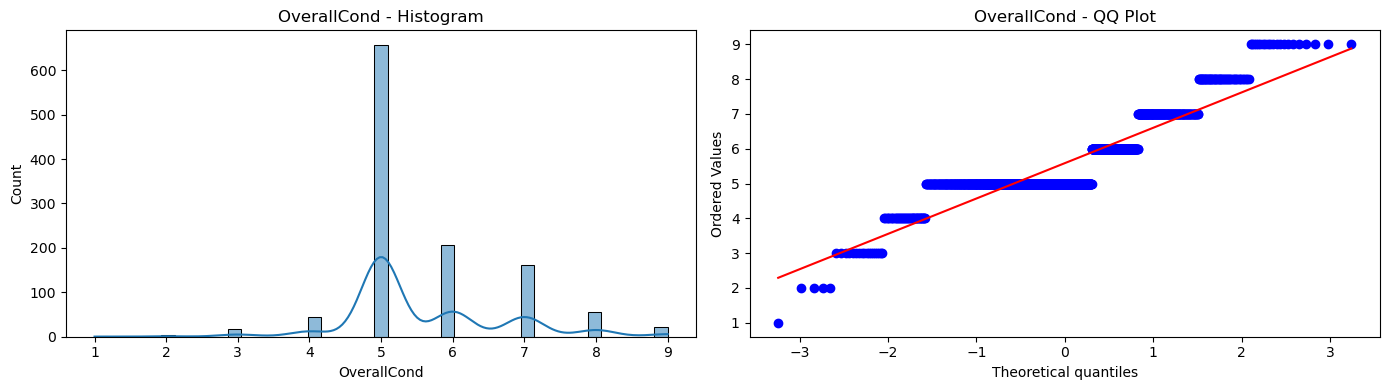

In [14]:
for col in X_train.columns[:6]:    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col} - Histogram")

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"{col} - QQ Plot")

    plt.tight_layout()
    plt.show()

# Box-Cox Transformation

In [15]:
pt_bc = PowerTransformer(method='box-cox')

X_train_bc = pt_bc.fit_transform(X_train + 1e-6)
X_test_bc = pt_bc.transform(X_test + 1e-6)

pd.DataFrame({"Feature": X_train.columns,
              "BoxCox_Lambda": pt_bc.lambdas_})

,Feature,BoxCox_Lambda
0,Id,0.700946
1,MSSubClass,-0.215523
2,LotFrontage,0.379792
3,LotArea,0.002822
4,OverallQual,0.794152
5,OverallCond,0.412523
6,YearBuilt,22.199457
7,YearRemodAdd,41.131043
8,MasVnrArea,-0.053397
9,BsmtFinSF1,0.108175


In [16]:
lr = LinearRegression()
lr.fit(X_train_bc, y_train)

y_pred_bc = lr.predict(X_test_bc)
print("Box-Cox R2:", r2_score(y_test,y_pred_bc))

Box-Cox R2: 0.7787882937185842


In [17]:
X_bc_full = pt_bc.fit_transform(X + 1e-6)
np.mean(cross_val_score(lr, X_bc_full, y, scoring='r2'))

0.7743262907972817

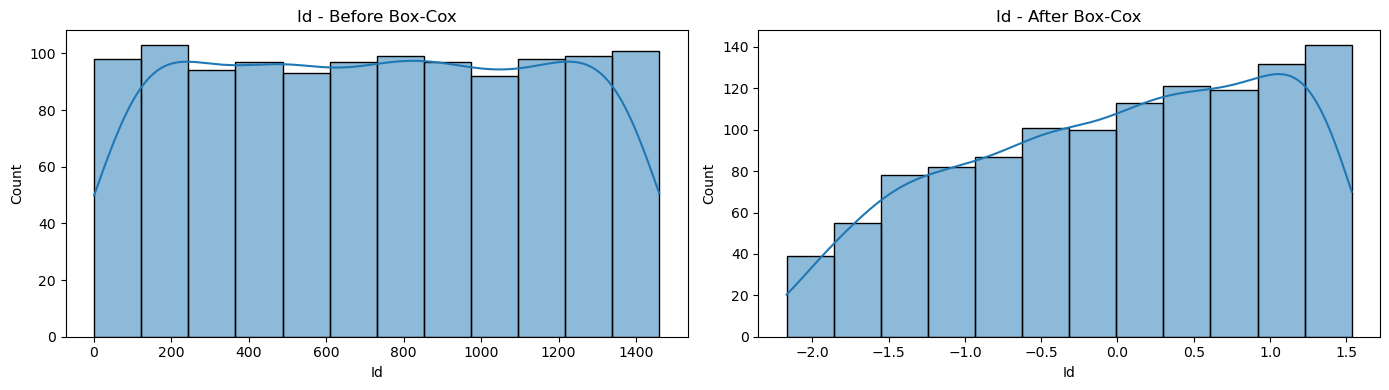

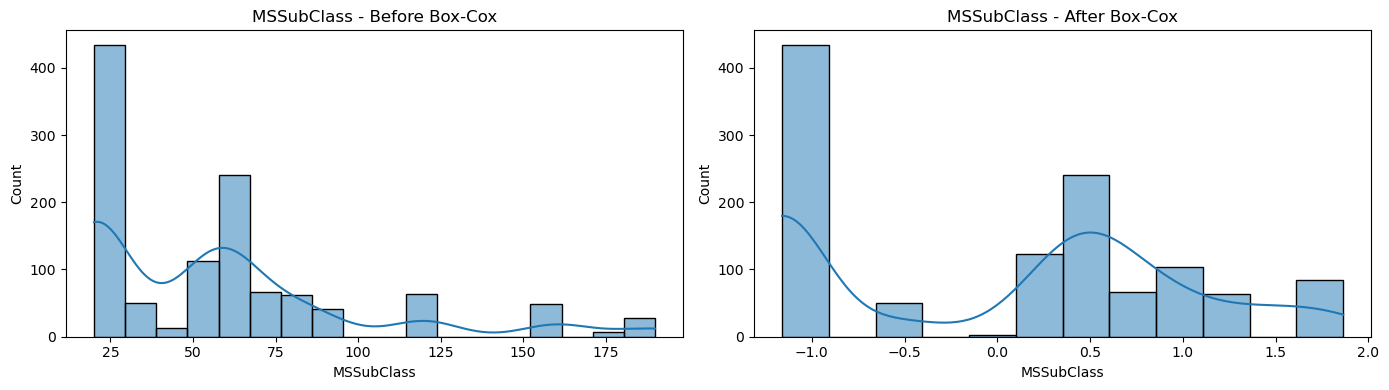

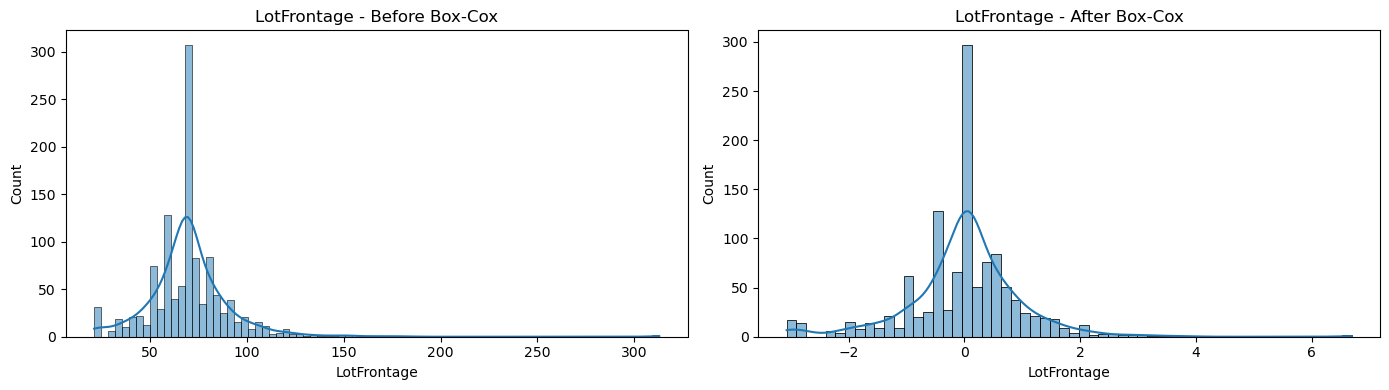

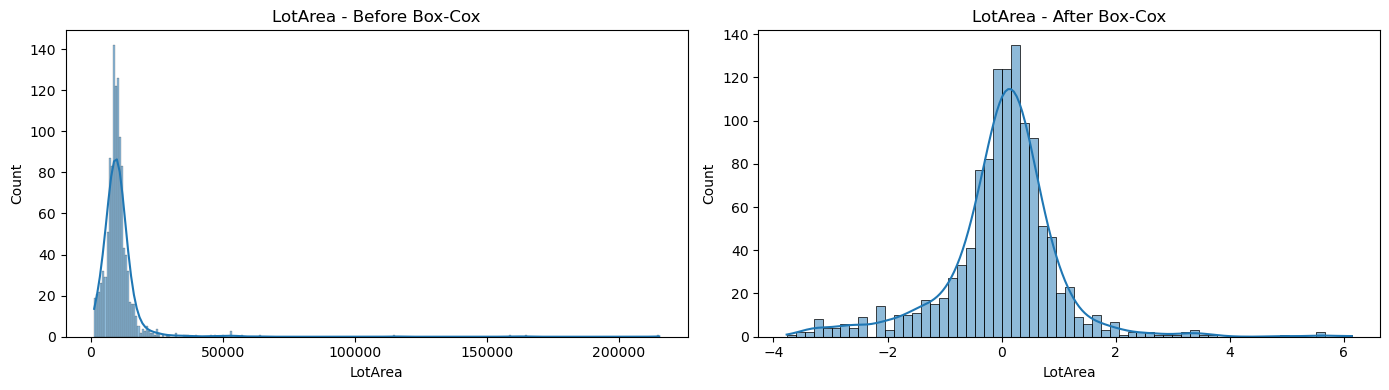

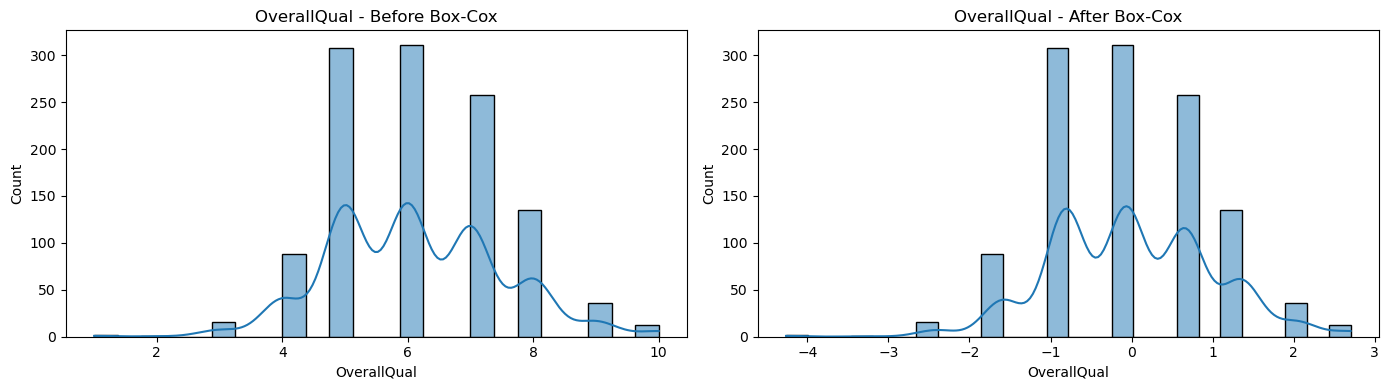

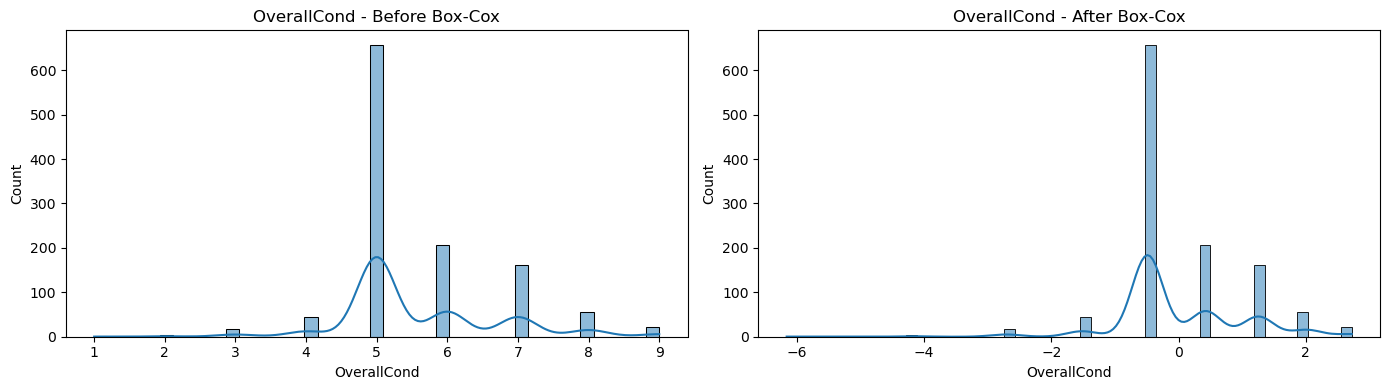

In [18]:
X_train_bc_df = pd.DataFrame(X_train_bc, columns=X_train.columns)

for col in X_train.columns[:6]:
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col} - Before Box-Cox")

    plt.subplot(122)
    sns.histplot(X_train_bc_df[col], kde=True)
    plt.title(f"{col} - After Box-Cox")

    plt.tight_layout()
    plt.show()

# Yeo-Johnson Transformation

In [19]:
pt_yj = PowerTransformer()

X_train_yj = pt_yj.fit_transform(X_train)
X_test_yj = pt_yj.transform(X_test)

pd.DataFrame({"Feature": X_train.columns,
              "YeoJohnson_Lambda": pt_yj.lambdas_})

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


,Feature,YeoJohnson_Lambda
0,Id,0.703114
1,MSSubClass,-0.234042
2,LotFrontage,0.367933
3,LotArea,0.002693
4,OverallQual,0.736038
5,OverallCond,0.231606
6,YearBuilt,22.210392
7,YearRemodAdd,41.151549
8,MasVnrArea,-0.218757
9,BsmtFinSF1,0.230749


In [20]:
lr = LinearRegression()
lr.fit(X_train_yj, y_train)

y_pred_yj = lr.predict(X_test_yj)
print("Yeo-Johnson R2:", r2_score(y_test, y_pred_yj))

Yeo-Johnson R2: 0.7852866795796374


In [21]:
X_yj_full = pt_yj.fit_transform(X)
np.mean(cross_val_score(lr, X_yj_full, y, scoring='r2'))

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


0.7780438456923154

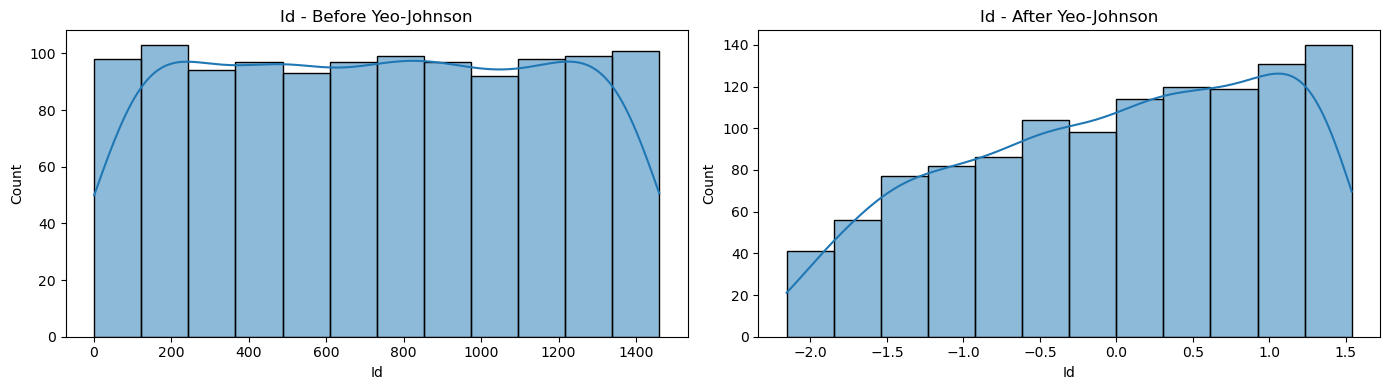

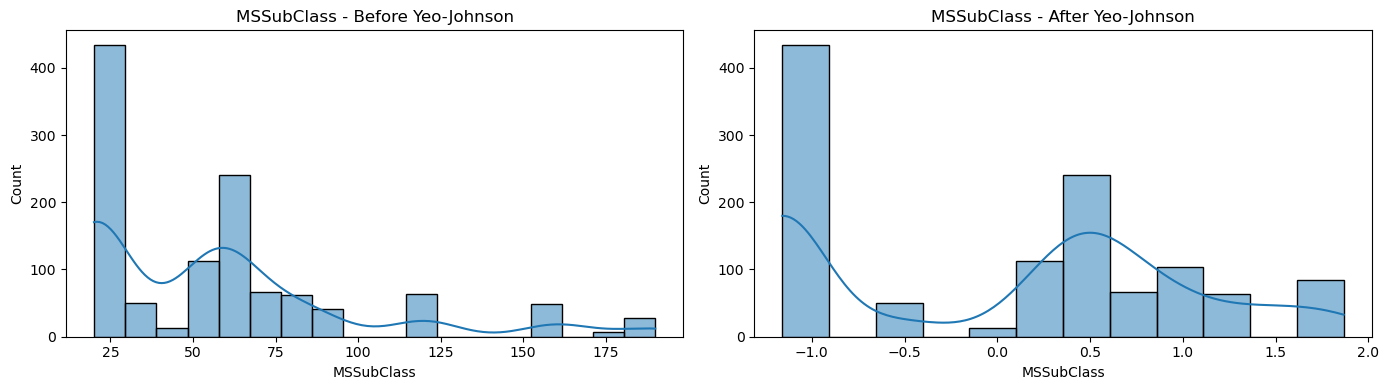

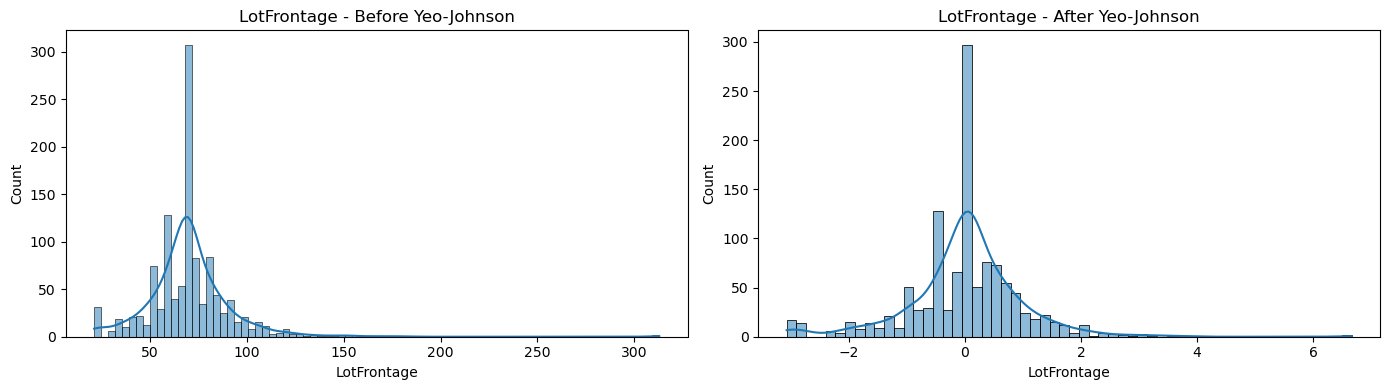

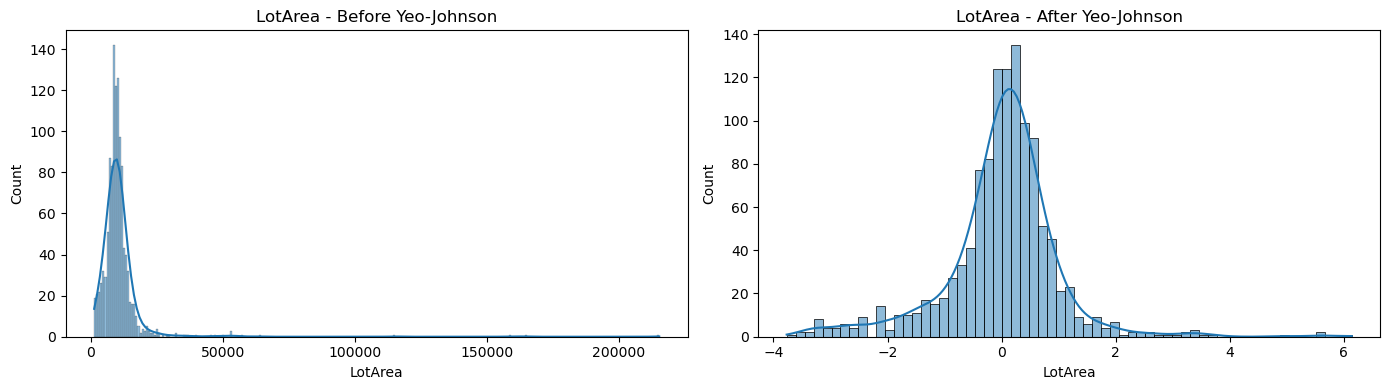

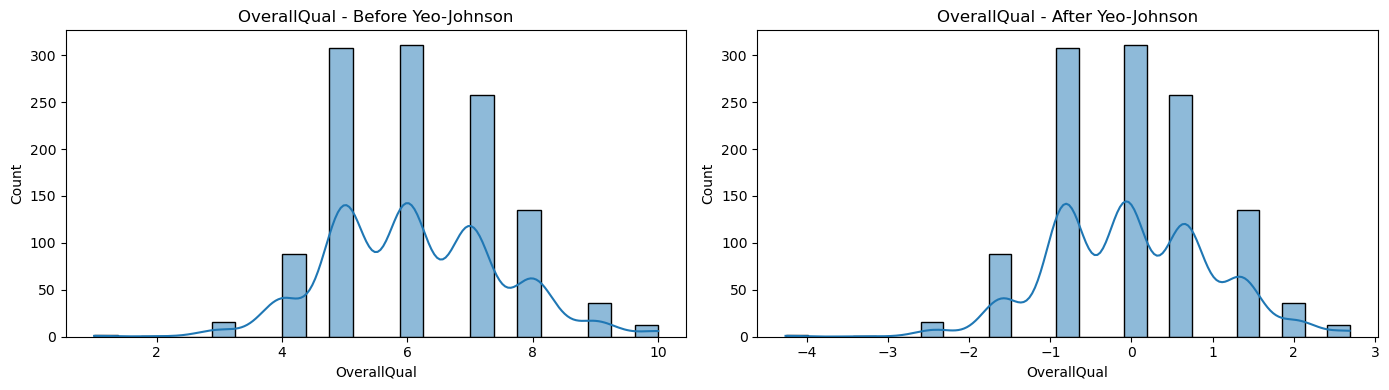

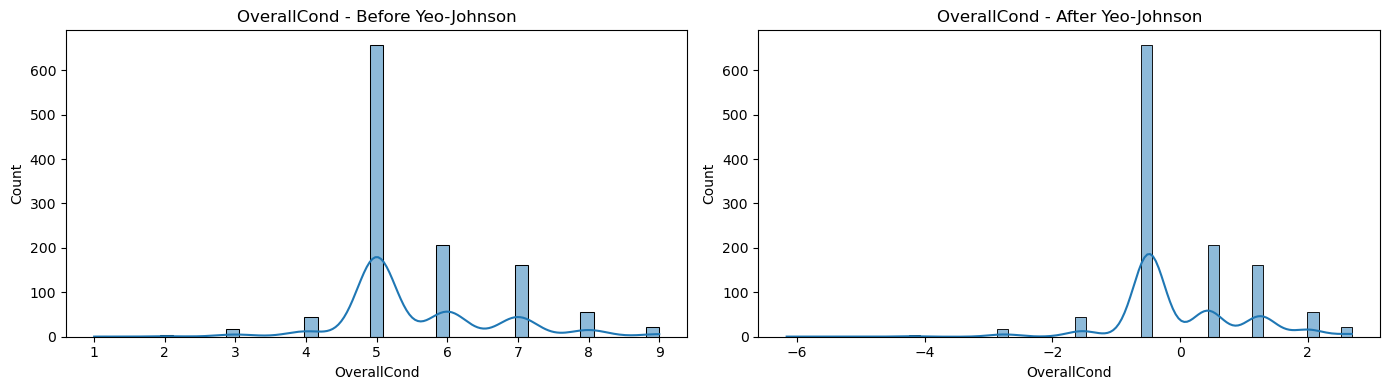

In [22]:
X_train_yj_df = pd.DataFrame(X_train_yj, columns=X_train.columns)

for col in X_train.columns[:6]:
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col} - Before Yeo-Johnson")

    plt.subplot(122)
    sns.histplot(X_train_yj_df[col], kde=True)
    plt.title(f"{col} - After Yeo-Johnson")

    plt.tight_layout()
    plt.show()

In [23]:
lambda_compare = pd.DataFrame({
    "Feature": X_train.columns,
    "BoxCox_Lambda": pt_bc.lambdas_,
    "YeoJohnson_Lambda": pt_yj.lambdas_
})

lambda_compare

,Feature,BoxCox_Lambda,YeoJohnson_Lambda
0,Id,0.708836,0.710746
1,MSSubClass,-0.210841,-0.229315
2,LotFrontage,0.426712,0.415517
3,LotArea,0.030946,0.030819
4,OverallQual,0.762246,0.699198
5,OverallCond,0.413912,0.238459
6,YearBuilt,22.116552,22.127437
7,YearRemodAdd,40.568189,40.588386
8,MasVnrArea,-0.061863,-0.244301
9,BsmtFinSF1,0.107744,0.228726
